In [157]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as ptl
 

In [158]:
past_df = pd.read_csv('train.csv', index_col='Date')
future_df = pd.read_csv('test.csv', index_col='Date')
past_df.shape , future_df.shape

((665, 7), (228, 7))

In [159]:
past_df

,Symbol,Open,High,Low,Close,Percent Change,Volume
Date,,,,,,,
2022-12-29,NEPSE,1973.18,2029.11,1962.42,2029.03,2.88 %,"2,860,345,781.68"
2022-12-28,NEPSE,1991.81,1994.33,1961.57,1972.15,-0.60 %,"2,153,547,207.91"
2022-12-27,NEPSE,1928.81,1999.01,1928.81,1983.95,3.11 %,"3,884,396,997.98"
2022-12-26,NEPSE,1868.18,1924.09,1866.37,1924.09,3.05 %,"2,097,049,941.35"
2022-12-22,NEPSE,1864.41,1867.21,1850.58,1867.21,0.00 %,"1,119,797,921.31"
...,...,...,...,...,...,...,...
2020-01-07,NEPSE,1200.65,1218.14,1200.65,1216.92,0.00 %,"1,102,736,748.00"
2020-01-06,NEPSE,1183.35,1200.69,1183.35,1200.69,0.00 %,"842,582,150.00"
2020-01-05,NEPSE,1166.49,1187.33,1163.39,1182.31,0.00 %,"712,425,827.00"


In [160]:
past_df.dtypes

Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Percent Change     object
Volume             object
dtype: object

In [161]:
past_df['Percent Change'].unique()

array(['2.88 %', '-0.60 %', '3.11 %', '3.05 %', '0.00 %', '-0.31 %',
       '0.76 %', '0.21 %', '-1.46 %', '-0.76 %', '-0.14 %', '-0.13 %',
       '0.90 %', '-1.67 %', '-0.86 %', '-0.25 %', '-1.25 %', '0.11 %',
       '0.58 %', '-0.18 %', '0.15 %', '-0.79 %', '1.68 %', '0.60 %',
       '-0.40 %', '-0.37 %', '1.34 %', '0.71 %', '-0.35 %', '1.13 %',
       '-0.56 %', '-1.23 %', '-2.00 %', '-0.33 %', '2.25 %', '-0.83 %',
       '0.38 %', '2.99 %', '0.88 %', '0.78 %', '-0.07 %', '-0.69 %',
       '-0.52 %', '0.22 %', '0.61 %', '-1.43 %', '2.41 %', '0.89 %',
       '0.35 %', '-1.30 %', '-0.53 %', '-2.07 %', '-1.78 %', '-0.73 %',
       '-2.88 %', '2.45 %', '1.11 %', '-0.70 %', '-0.59 %', '-0.11 %',
       '-0.61 %', '-1.08 %', '-0.22 %', '0.34 %', '-0.08 %', '-0.05 %',
       '-1.10 %', '0.19 %', '-1.65 %', '-0.89 %', '0.14 %', '0.09 %',
       '-0.36 %', '1.35 %', '-0.02 %', '-1.20 %', '2.78 %', '-1.37 %',
       '-0.92 %', '-0.29 %', '-2.06 %', '0.49 %', '-1.62 %', '-1.77 %',
       '0.05

In [162]:
## we have '-- %' this value  so , 
def convert_str_float(df):
    df['Percent Change'] = df['Percent Change'].str.rstrip('%')
    df['Percent Change'] = pd.to_numeric(df['Percent Change'],errors = 'coerce') # convert string to float and if any non-numerical values occures , than convert that into NAN 

    #convert volume
    df['Volume'] = df['Volume'].str.replace(',' , '').astype(float)
    

 convert object type to flaot

In [163]:
convert_str_float(past_df)
convert_str_float(future_df)

calculate adjust columns 

In [164]:
def calculate_adjusted_close(df):

    # Ensure there are no NaN values in 'Percent Change'

    df= df.dropna()
    if df['Percent Change'].isnull().any():
        raise ValueError("The 'Percent Change' column contains non-numeric values that cannot be converted to float.")

    starting_price = df['Close'].iloc[0]
    adjusted_closing_prices = []

    # Calculate the adjusted closing prices
    for percentage_change in df['Percent Change']:
        adjusted_price = starting_price * (1 + percentage_change / 100)
        adjusted_closing_prices.append(adjusted_price)
        starting_price = adjusted_price

    df['Adjusted Close'] = adjusted_closing_prices

    return df


In [165]:
past_df = calculate_adjusted_close(past_df)
future_df = calculate_adjusted_close(future_df)


C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_21644\1624573191.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Adjusted Close'] = adjusted_closing_prices


In [166]:
past_df

,Symbol,Open,High,Low,Close,Percent Change,Volume,Adjusted Close
Date,,,,,,,,
2022-12-29,NEPSE,1973.18,2029.11,1962.42,2029.03,2.88,2.860346e+09,2087.466064
2022-12-28,NEPSE,1991.81,1994.33,1961.57,1972.15,-0.60,2.153547e+09,2074.941268
2022-12-27,NEPSE,1928.81,1999.01,1928.81,1983.95,3.11,3.884397e+09,2139.471941
2022-12-26,NEPSE,1868.18,1924.09,1866.37,1924.09,3.05,2.097050e+09,2204.725835
2022-12-22,NEPSE,1864.41,1867.21,1850.58,1867.21,0.00,1.119798e+09,2204.725835
...,...,...,...,...,...,...,...,...
2020-01-07,NEPSE,1200.65,1218.14,1200.65,1216.92,0.00,1.102737e+09,1494.374856
2020-01-06,NEPSE,1183.35,1200.69,1183.35,1200.69,0.00,8.425822e+08,1494.374856
2020-01-05,NEPSE,1166.49,1187.33,1163.39,1182.31,0.00,7.124258e+08,1494.374856


In [167]:
# remove unwanted columns 
past_df.drop(columns=['Symbol','Percent Change'],inplace= True )
future_df.drop(columns=['Symbol','Percent Change'], inplace = True)


C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_21644\1116796076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_df.drop(columns=['Symbol','Percent Change'],inplace= True )


In [168]:
past_df

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2022-12-29,1973.18,2029.11,1962.42,2029.03,2.860346e+09,2087.466064
2022-12-28,1991.81,1994.33,1961.57,1972.15,2.153547e+09,2074.941268
2022-12-27,1928.81,1999.01,1928.81,1983.95,3.884397e+09,2139.471941
2022-12-26,1868.18,1924.09,1866.37,1924.09,2.097050e+09,2204.725835
2022-12-22,1864.41,1867.21,1850.58,1867.21,1.119798e+09,2204.725835
...,...,...,...,...,...,...
2020-01-07,1200.65,1218.14,1200.65,1216.92,1.102737e+09,1494.374856
2020-01-06,1183.35,1200.69,1183.35,1200.69,8.425822e+08,1494.374856
2020-01-05,1166.49,1187.33,1163.39,1182.31,7.124258e+08,1494.374856


In [169]:
def add_original_feature(df , df_new):
    df_new['open'] = df['Open'] #today opening prices
    df_new['open_1'] = df['Open'].shift(1) #  yesterdat open prices 
    df_new['Close_1'] = df['Close'].shift(1) # yesterday  close prices
    df_new['high_1'] = df['High'].shift(1) # yesterday high 
    df_new['low_1'] = df['Low'].shift(1) 
    df_new['volume_1']=df['Volume'].shift(1)
    


In [170]:
def add_avg_price(df, df_new):
   #taking 5 working days insted to 6  

   df_new['avg_price_5'] =  df['Close'].rolling(6).mean().shift(1)
   df_new['avg_price_30'] =    df['Close'].rolling(21).mean().shift(1)
   df_new['avg_price_365'] =   df['Close'].rolling(252).mean().shift(1)
   df_new['ratio_avg_price_5_30'] =   df_new['avg_price_5'] / df_new['avg_price_30']
   df_new['ratio_avg_price_5_365'] =  df_new['avg_price_5'] / df_new['avg_price_365']
   df_new['ratio_avg_price_30_365'] =  df_new['avg_price_30'] / df_new['avg_price_365']

In [171]:
def add_avg_volume(df, df_new):
  df_new['avg_volume_5'] =  df['Volume'].rolling(5).mean().shift(1)
  df_new['avg_volume_30'] =    df['Volume'].rolling(21).mean().shift(1)
  df_new['avg_volume_365'] =  df['Volume'].rolling(252).mean().shift(1)
  df_new['ratio_avg_volume_5_30'] =  df_new['avg_volume_5'] / df_new['avg_volume_30']
  df_new['ratio_avg_volume_5_365'] =  df_new['avg_volume_5'] / df_new['avg_volume_365']
  df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

In [172]:
def add_std_price(df, df_new):
    df_new['std_price_5'] =  df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] =  df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']

In [173]:
def add_std_volume(df, df_new):
    df_new['std_volume_5'] =  df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] =  df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] =  df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] =  df_new['std_volume_30'] / df_new['std_volume_365']

In [174]:
def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1))    
                               / df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) 
                               / df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - 
           df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] - 
         df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)

In [175]:
def generate_features(df):
    """ Generate features for a stock/index based on historical price and performance
        @param df: dataframe with columns "Open", "Close", "High",
        "Low", "Volume", "Adjusted Close"
        @return: dataframe, data set with new features """
    df_new = pd.DataFrame()
    # 6 original features
    add_original_feature(df, df_new)
    # 31 generated features
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    # the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new

In [176]:
future_df

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2023-12-28,2072.09,2085.36,2059.49,2068.90,4.290932e+09,2067.037990
2023-12-27,2089.89,2109.35,2055.35,2070.84,5.248783e+09,2050.088278
2023-12-24,2113.69,2132.63,2082.93,2088.07,7.111734e+09,2029.792405
2023-12-21,2148.16,2154.51,2102.79,2109.10,6.274325e+09,1998.736581
2023-12-20,2113.94,2150.98,2110.76,2141.87,7.009575e+09,2032.315355
...,...,...,...,...,...,...
2023-01-05,2134.88,2160.73,2113.32,2143.93,5.040741e+09,1989.042809
2023-01-04,2069.34,2126.04,2066.57,2125.84,3.501142e+09,2051.498753
2023-01-03,2066.02,2081.53,2050.57,2061.06,3.458090e+09,2048.421505


In [177]:

future_df.index  = pd.to_datetime(future_df.index , format ='%Y-%m-%d' )[::-1]
past_df.index = pd.to_datetime(past_df.index , format='%Y-%m-%d' )[::-1]
past_df

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2020-01-01,1973.18,2029.11,1962.42,2029.03,2.860346e+09,2087.466064
2020-01-02,1991.81,1994.33,1961.57,1972.15,2.153547e+09,2074.941268
2020-01-05,1928.81,1999.01,1928.81,1983.95,3.884397e+09,2139.471941
2020-01-06,1868.18,1924.09,1866.37,1924.09,2.097050e+09,2204.725835
2020-01-07,1864.41,1867.21,1850.58,1867.21,1.119798e+09,2204.725835
...,...,...,...,...,...,...
2022-12-22,1200.65,1218.14,1200.65,1216.92,1.102737e+09,1494.374856
2022-12-26,1183.35,1200.69,1183.35,1200.69,8.425822e+08,1494.374856
2022-12-27,1166.49,1187.33,1163.39,1182.31,7.124258e+08,1494.374856


## train 

In [178]:
data =  pd.concat([past_df, future_df])
data = generate_features(data)
data

,open,open_1,Close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-20,2351.93,2283.67,2418.85,2418.84,2283.67,1.842647e+09,2415.378333,2592.307143,2227.307024,0.931749,...,0.592882,0.965708,0.001752,-0.035431,-0.173534,0.226504,-0.008334,-0.009312,0.000804,2282.01
2021-04-21,2448.66,2351.93,2282.01,2351.93,2259.51,3.995604e+09,2377.763333,2564.890952,2228.489802,0.927043,...,0.654204,0.932249,-0.056572,-0.055283,-0.201466,0.150236,-0.006989,-0.008896,0.000922,2361.27
2021-04-22,2454.42,2448.66,2361.27,2455.72,2359.95,3.382510e+09,2368.716667,2543.826667,2230.224643,0.931163,...,0.631327,0.825009,0.034733,0.001043,-0.157778,0.227214,-0.010954,-0.010467,0.000674,2449.97
2021-04-25,2508.29,2454.42,2449.97,2465.08,2428.33,2.673309e+09,2383.910000,2525.533333,2232.537183,0.943923,...,0.596279,0.785671,0.037565,0.030811,-0.135548,0.312102,0.000690,-0.007911,0.000932,2455.81
2021-04-26,2549.36,2508.29,2455.81,2511.69,2448.78,2.663910e+09,2397.088333,2509.860000,2234.872857,0.955069,...,0.450529,0.702521,0.002384,0.017059,-0.118185,0.315223,0.006683,-0.006641,0.001198,2508.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,2134.88,2148.93,2164.61,2191.69,2126.47,5.459925e+09,2178.565000,2157.201905,1907.016112,1.009903,...,0.961453,1.038754,-0.021318,-0.003907,0.020200,0.613719,0.003072,0.002430,0.002843,2143.93
2023-12-21,2069.34,2134.88,2143.93,2160.73,2113.32,5.040741e+09,2173.703333,2155.360000,1910.268771,1.008511,...,0.721973,1.027437,-0.009554,-0.017497,-0.017722,0.618965,-0.000667,0.001046,0.002772,2125.84
2023-12-24,2066.02,2069.34,2125.84,2126.04,2066.57,3.501142e+09,2164.325000,2153.247143,1913.466588,1.005145,...,1.013128,1.027048,-0.008438,-0.010957,-0.020445,0.610497,-0.003407,-0.000774,0.002784,2061.06


In [183]:
data.loc['2023-01-01' :'2023-12-28']

,open,open_1,Close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,2072.09,1166.52,1169.50,1169.50,1163.99,3.729883e+08,1190.871667,1263.057619,1783.150833,0.942848,...,0.103923,0.170555,0.002821,-0.033151,-0.117612,-0.566773,-0.007821,-0.006732,-0.003099,2068.90
2023-01-02,2089.89,2072.09,2068.90,2085.36,2059.49,4.290932e+09,1334.088333,1299.391905,1780.505992,1.026702,...,0.614347,0.305117,0.769047,0.700112,0.584296,-0.243657,-0.006678,-0.005846,-0.003144,2070.84
2023-01-03,2113.69,2089.89,2070.84,2109.35,2055.35,5.248783e+09,1476.408333,1335.805714,1777.950635,1.105257,...,0.873454,0.442053,0.000938,0.724708,0.585453,-0.237201,0.145921,0.031476,-0.000145,2088.07
2023-01-04,2148.16,2113.69,2088.07,2132.63,2082.93,7.111734e+09,1624.305000,1373.303333,1775.555833,1.182772,...,1.107869,0.631565,0.008320,0.766093,0.605442,-0.224216,0.148776,0.031511,-0.000111,2109.10
2023-01-05,2113.94,2148.16,2109.10,2154.51,2102.79,6.274325e+09,1778.770000,1412.942381,1773.312738,1.258912,...,0.977671,0.723882,0.010072,0.808508,0.652019,-0.211363,0.153502,0.032109,-0.000044,2141.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,2134.88,2148.93,2164.61,2191.69,2126.47,5.459925e+09,2178.565000,2157.201905,1907.016112,1.009903,...,0.961453,1.038754,-0.021318,-0.003907,0.020200,0.613719,0.003072,0.002430,0.002843,2143.93
2023-12-21,2069.34,2134.88,2143.93,2160.73,2113.32,5.040741e+09,2173.703333,2155.360000,1910.268771,1.008511,...,0.721973,1.027437,-0.009554,-0.017497,-0.017722,0.618965,-0.000667,0.001046,0.002772,2125.84
2023-12-24,2066.02,2069.34,2125.84,2126.04,2066.57,3.501142e+09,2164.325000,2153.247143,1913.466588,1.005145,...,1.013128,1.027048,-0.008438,-0.010957,-0.020445,0.610497,-0.003407,-0.000774,0.002784,2061.06


In [184]:
start_train, end_train = '2020-01-01', '2022-12-29'
start_test, end_test = '2023-01-01', '2023-12-28'


# our index is on date datatyoe so covnert into str
data.index = data.index.astype(str)

data_train = data.loc[start_train:end_train]
data_test = data.loc[start_test : end_test]

X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values

X_test = data_test.drop('close', axis=1).values
y_test = data_test['close'].values

# Training set:
print(X_train.shape)  # 
print(y_train.shape)  

#test set 
print(X_train.shape)  # 
print(y_train.shape)  

# Test set: 251 samples, 37 features
print(X_test.shape)  # (251, 37)



(410, 37)
(410,)
(410, 37)
(410,)
(228, 37)


SGD-based Linear Regression:


In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

param_grid = {"alpha": [1e-4, 3e-4, 1e-3], "eta0": [0.01, 0.03, 0.1]}
lr = SGDRegressor(penalty='l2', max_iter=1000, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

lr_best = grid_search.best_estimator_
predictions_lr = lr_best.predict(X_scaled_test)


In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 5]
}
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

rf_best = grid_search.best_estimator_
predictions_rf = rf_best.predict(X_test)


In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

param_grid = {"alpha": [1e-4, 3e-4, 1e-3], "eta0": [0.01, 0.03, 0.1]}
lr = SGDRegressor(penalty='l2', max_iter=1000, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

lr_best = grid_search.best_estimator_
predictions_svr = lr_best.predict(X_scaled_test)




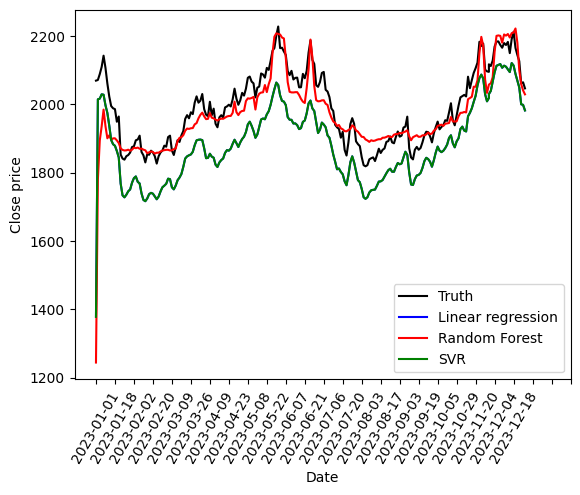

<Figure size 640x480 with 0 Axes>

In [204]:
import matplotlib.pyplot as plt

plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index, predictions_lr, c='b')
plt.plot(data_test.index, predictions_rf, c='r')
plt.plot(data_test.index, predictions_svr, c='g')
plt.xticks(range(0, 252, 10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Linear regression', 'Random Forest', 'SVR'])
plt.show()
plt.savefig('plot.png')